In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# User FFT for blur detection in images and video streams
# Based on https://pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

def detect_blur_fft(image, size=60, thresh=10, vis=False):
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))  # compute the center (x,y) coordinates

    # compute the FFT to find the frequency transform
    # then shift the zero frequency component (DC component that located in the top-left corner) to the center where it will be easier to analyze
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)

    # check if we are visualizing output or not
    if vis:
        # compute the magnitude spectrum of the transform
        magnitude = 20 * np.log(np.abs(fft_shift))

        # the original input image
        (fig, ax) = plt.subplots(1, 2, )
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title("Input")
        ax[0].set_xticks([])
        ax[0].set_yticks([])

        # the magnitude image
        ax[1].imshow(magnitude, cmap="gray")
        ax[1].set_title("Magnitude Spectrum")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        # show our plots
        plt.show()

    # zero-out the center of the FFT shift (remove low frequencies)
    # => apply inverse shift such that the DC component once again becomes the top-left
    # => apply inverse FFT
    fft_shift[cY - size:cY + size, cX - size:cX + size] = 0
    fft_shift = np.fft.ifftshift(fft_shift)
    recon = np.fft.ifft2(fft_shift)


    magnitude = 20 * np.log(np.abs(recon))
    mean = np.mean(magnitude)

    return mean, mean <= thresh

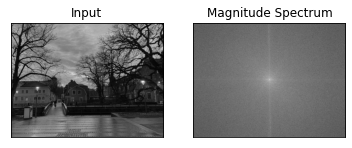

[INFO] Not Blurry (41.1179)


In [3]:
img = cv2.imread('Photos/Uppsala Sunset.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(mean, blurry) = detect_blur_fft(gray_img, size=60, thresh=20, vis=-1)

# draw on the image, indicating whether it is blurry or not
image = np.dstack([gray_img] * 3)
color = (0, 0, 255) if blurry else (0, 255, 0)
text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
text = text.format(mean)
cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	color, 2)
print("[INFO] {}".format(text))
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

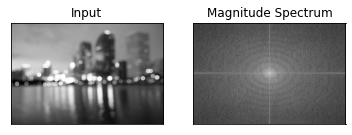

[INFO] Blurry (4.2215)


In [6]:
img2 = cv2.imread('Photos/blurry.jpg')
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(mean, blurry) = detect_blur_fft(gray_img2, size=60, thresh=20, vis=-1)

# draw on the image, indicating whether it is blurry or not
image = np.dstack([gray_img2] * 3)
color = (0, 0, 255) if blurry else (0, 255, 0)
text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
text = text.format(mean)
cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	color, 2)
print("[INFO] {}".format(text))
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()